<table align="center" width=100%>
    <tr>
        </td>
            </td>
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Project - House_Sold
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

# Problem Statement

This dataset is created for the prediction of Hous to be sold or not in next 3 months from an Indian perspective. The dataset contains various features that are important during the application for Architect community. The predicted output obtained from the classification algorithm gives a fair idea about the chances of a House being sold or not.

# Data Dictionary 
 
 The Data set contains 506 observations of House Price From Different Towns. Corresponding to each house price,data of other veriables is available on which price is suspected to depend.

## About the dataset (House Pricing prediction data) 

**price:** Value of the house 

**resid_area:** Preporsion of residential area in the town

**air_qual:** Quality of Air in that neighborhood

**room_num:** Avearge number of rooms in houses of that locality

**age:** How old is the house counstuction  in years

**dist1:** Distance from employment hub 1

**dist2:** Distance from employment hub 2

**dist3:** Distance from employment hub 3

**dist4:** Distance from employment hub 4

**teachers:** Number of Teachers per 1000 population in the town

**poor_prop:** Preportion of poor population in the town

**airport:** Is there an airport in city? (Yes/No)

**n_hos_beds:** Number of Hospital Beds per 1000 population in the town

**n_hot_rooms:** Number of Hotel rooms per 1000 population in town

**waterbody:** What type of natural fresh water sourcs is there in the city (Lake/River/Both/None)

**rainfall:** The yearly average rainfall in centimeters

**bus_ter:** Is there a bus terminal in city? (Yes/No)

**parks:** Proportion of land assigned as park and green areas in town

**Sold:** Is house sold or not (0-No/1-Yes)

## Table of Content

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
    - 2.1 - **[Read the Data](#read)**
    - 2.2 - **[Check the Data Type](#dtype)**
    - 2.3 - **[Remove Insignificant Variables](#drop)**
    - 2.4 - **[Distribution of Variables](#dist)**
    - 2.5 - **[Missing Value Treatment](#null)**
    - 2.6 - **[Based on Boxplot](#boxplot)**
    - 2.7 - **[Based on IQR](#iqr)**
    - 2.8 - **[Dummy Encode the Categorical Variables](#dummy)**
    - 2.9 - **[Scale the Data](#scale)**
    - 2.10 - **[Train-Test Split](#split)**
3. **[Logistic Regression (Full Model)](#logit)**
5. **[Coclusion](#result)**

<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image  

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm


In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

<a id="prep"></a>
# 2. Data Preparation

<a id="read"></a>
## 2.1 Read the Data

In [3]:
# load the csv file
# store the data in 'df_houseprice'
df_houseprice = pd.read_csv("C:/Users/abc/Desktop/Linnear Model on R/Data Files/Logistic Reg Dataset/House-Price.csv")

# display first five observations using head()
df_houseprice.head()

,price,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,Sold
0,24.000000,32.310000,0.538000,6.575000,65.200000,4.350000,3.810000,4.180000,4.010000,24.700000,4.980000,YES,5.480000,11.192000,River,23,YES,0.049347,0
1,21.600000,37.070000,0.469000,6.421000,78.900000,4.990000,4.700000,5.120000,5.060000,22.200000,9.140000,NO,7.332000,12.172800,Lake,42,YES,0.046146,1
2,34.700000,37.070000,0.469000,7.185000,61.100000,5.030000,4.860000,5.010000,4.970000,22.200000,4.030000,NO,7.394000,101.120000,None,38,YES,0.045764,0
3,33.400000,32.180000,0.458000,6.998000,45.800000,6.210000,5.930000,6.160000,5.960000,21.300000,2.940000,YES,9.268000,11.267200,Lake,45,YES,0.047151,0
4,36.200000,32.180000,0.458000,7.147000,54.200000,6.160000,5.860000,6.370000,5.860000,21.300000,5.330000,NO,8.824000,11.289600,Lake,55,YES,0.039474,0


**Let us now see the number of variables and observations in the data.**

In [4]:
# use 'shape' to check the dimension of data
df_houseprice.shape

(506, 19)

**Interpretation:** The data has 506 observations and 19 variables.

<a id="dtype"></a>
## 2.2 Check the Data Type

In [5]:
# use 'dtypes' to check the data type of a variable
df_houseprice.dtypes

price          float64
resid_area     float64
air_qual       float64
room_num       float64
age            float64
dist1          float64
dist2          float64
dist3          float64
dist4          float64
teachers       float64
poor_prop      float64
airport         object
n_hos_beds     float64
n_hot_rooms    float64
waterbody       object
rainfall         int64
bus_ter         object
parks          float64
Sold             int64
dtype: object

**Interpretation:** The variables `price`, `Sold`, `resid_area`, `air_qual`, `room_num`, `age`,
    `dist1`, `dist2`, `dist3`, `dist4`, `teachers`, `poor_prop`,`n_hos_beds`, `n_hot_rooms`, `rainfall`,`parks` are numerical.

From the above output, we see that the data type of `bus_ter`,`waterbody`, `airport` are the 'Catagorical'.

And all veriables in Correct Datatypes

<a id="drop"></a>
## 2.3 Remove Insignificant Variables

In [6]:
# First Check Catagorical Columns
df_cat = df_houseprice.select_dtypes(include=[np.object])
df_cat.head()

,airport,waterbody,bus_ter
0,YES,River,YES
1,NO,Lake,YES
2,NO,None,YES
3,YES,Lake,YES
4,NO,Lake,YES


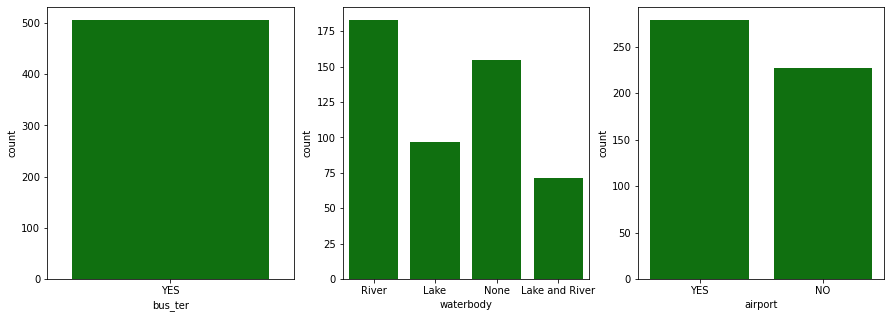

In [7]:
# Plot Subplots to Descover the Catagorical Veriables
fig,axes = plt.subplots(1,3,figsize = (15,5))
sns.countplot(df_cat.bus_ter,color = "g",ax = axes[0])
sns.countplot(df_cat.waterbody,color = "g",ax = axes[1])
sns.countplot(df_cat.airport,color = "g",ax = axes[2])
plt.show()

In [8]:
# So as we see here Bus_ter column have only one unique value that means it wont usefull for our analysis
# Axis  = 1  use for column 0 for row
# inplace = True indecate permanat changes
df_houseprice.drop("bus_ter",axis =1,inplace = True)

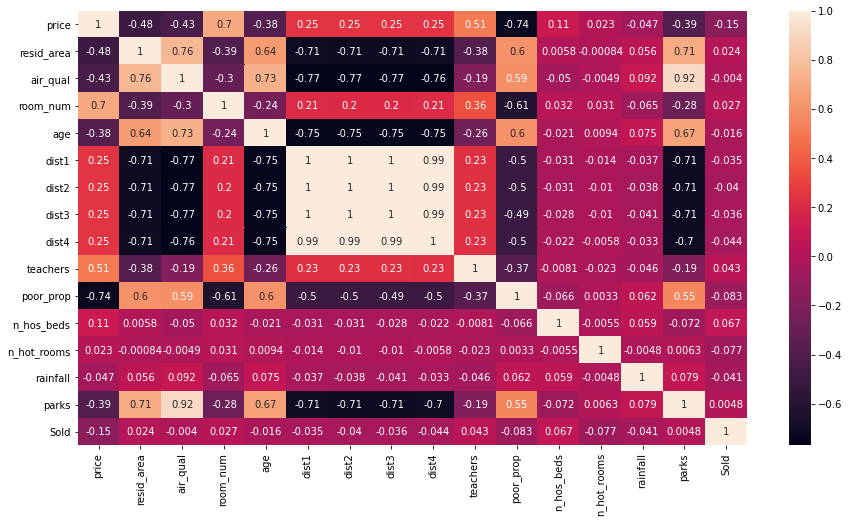

In [9]:
sns.heatmap(df_houseprice.corr(),annot = True,color = 'r')
plt.show()

**Interpretation:** The column `bus_ter` contains the serial number of the student, which is redundant for further analysis, Thus, we drop the column.
other than this we cant find any column to be unusable for our analysis.

<a id="dist"></a>
## 2.4 Distribution of Variables

**Distribution of numeric independent variables.**

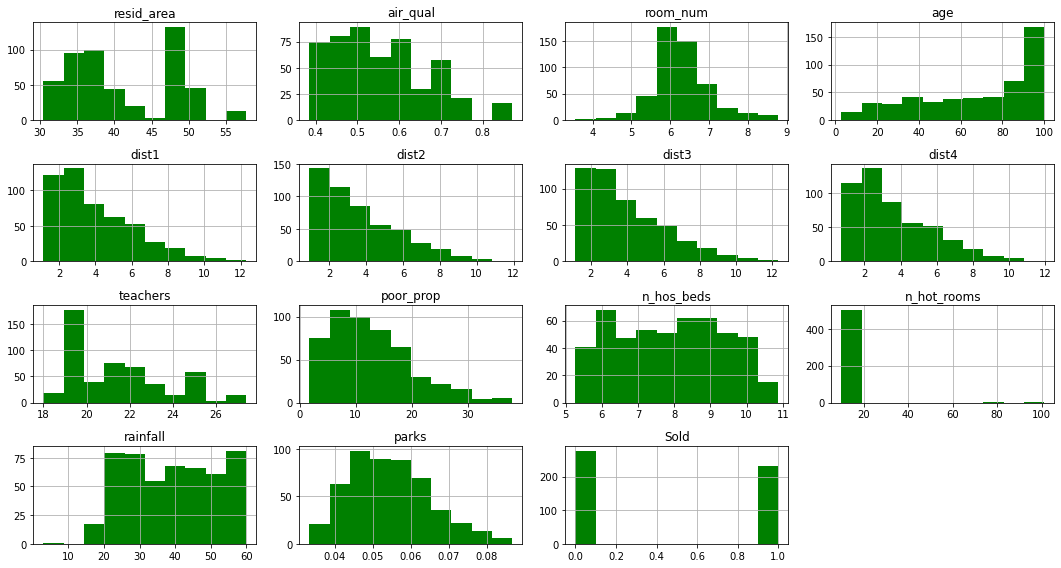

Skewness:


resid_area     0.295022
air_qual       0.729308
room_num       0.403612
age           -0.598963
dist1          1.010577
dist2          1.007492
dist3          1.003848
dist4          1.004680
teachers       0.802325
poor_prop      0.906460
n_hos_beds    -0.009176
n_hot_rooms   13.790552
rainfall       0.012971
parks          0.533991
Sold           0.183117
dtype: float64

In [10]:
# for the independent numeric variables, we plot the histogram to check the distribution of the variables
# Note: the hist() function considers the numeric variables only, by default
# we drop the target variable using drop()
# 'axis=1' drops the specified column
df_houseprice.drop('price', axis = 1).hist(color = "g")

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()  

# print the skewness for each numeric independent variable
print('Skewness:')
# we drop the target variable using drop()
# 'axis=1' drops the specified column
# skew() returns the coefficient of skewness for each variable
df_houseprice.drop('price', axis = 1).skew()

**Interpretation:** The above plot indicates that all the variables are not that much but slight normally distributed.

<a id="null"></a>
## 2.5 Missing Value Treatment

First run a check for the presence of missing values and their percentage for each column. Then choose the right approach to treat them.

In [11]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_houseprice.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_houseprice.isnull().sum()*100/df_houseprice.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
n_hos_beds,8,1.581028
Sold,0,0.000000
dist3,0,0.000000
resid_area,0,0.000000
air_qual,0,0.000000
room_num,0,0.000000
age,0,0.000000
dist1,0,0.000000
dist2,0,0.000000
dist4,0,0.000000


So as wee see in `n_hos_beds` contain `8` missing values and the percentage of missing value is `1.581028 %` that meanse its small amout of data so we can replace it with average of that veriable

In [12]:
df_houseprice.fillna(df_houseprice["n_hos_beds"].mean(),inplace=True)

In [13]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_houseprice.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_houseprice.isnull().sum()*100/df_houseprice.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Sold,0,0.000000
parks,0,0.000000
resid_area,0,0.000000
air_qual,0,0.000000
room_num,0,0.000000
age,0,0.000000
dist1,0,0.000000
dist2,0,0.000000
dist3,0,0.000000
dist4,0,0.000000


**Interpretation:** The above output shows that there are no missing values in the data.

<a id="boxplot"></a>
## 2.6 Based on Boxplots:

The boxplot() in seaborn plots a box plot of the specified data. The box represents the quartiles of the data while the whiskers extend to show the rest of the distribution. The points that are determined to be outliers are identified using  the interquartile range (IQR) method.

The next section deals with IQR method.

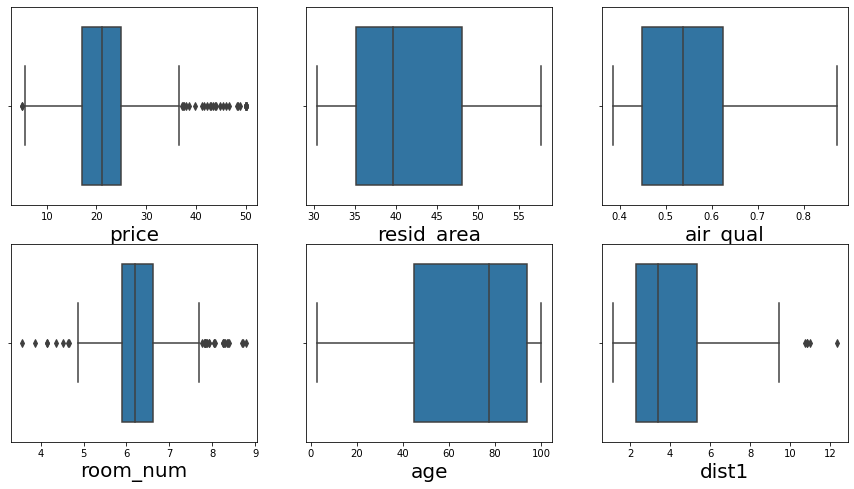

In [14]:
df_num = df_houseprice.select_dtypes(include=[np.number])
# Now Check Numirical Veriables
# plot the boxplot for each variable
# subplots(): plot subplots
# figsize(): set the figure size
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

# plot the boxplot using boxplot() from seaborn
# z: let the variable z define the boxplot
# x: data for which the boxplot is to be plotted
# orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# ax: specifies the axes object to draw the plot onto
# set_xlabel(): set the x-axis label
# fontsize: sets the font size of the x-axis label
for variable, subplot in zip(df_num.columns, ax.flatten()):
    z = sns.boxplot(x = df_num[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)                                     # set the x-axis label

**Interpretation:** Out of the six numeric variables, variables `room_num`, `dist1` and `price` have outliers.

<a id="iqr"></a>
## 2.7 Based on IQR

The IQR method can be used when the data distribution in non-normal. Also the quartiles are less affected by the extreme values.

In [15]:
# obtain the first quartile
Q1 = df_num.dist1.quantile(0.25)

# obtain the third quartile
Q3 = df_num.dist1.quantile(0.75)

# obtain the IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)
df_num = df_num[~((df_num.dist1 < (Q1 - 1.5 * IQR)) |(df_num.dist1 > (Q3 + 1.5 * IQR)))]

3.0974999999999997


In [16]:
# obtain the first quartile
Q1 = df_num.room_num.quantile(0.25)

# obtain the third quartile
Q3 = df_num.room_num.quantile(0.75)

# obtain the IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)
df_num = df_num[~((df_num.room_num < (Q1 - 1.5 * IQR)) |(df_num.room_num > (Q3 + 1.5 * IQR)))]

0.7379999999999995


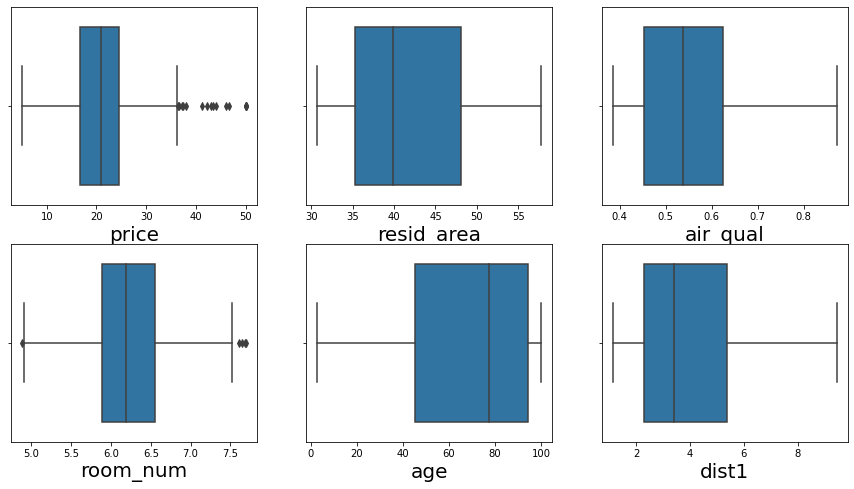

In [17]:
# Now Check Numirical Veriables
# plot the boxplot for each variable
# subplots(): plot subplots
# figsize(): set the figure size
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

# plot the boxplot using boxplot() from seaborn
# z: let the variable z define the boxplot
# x: data for which the boxplot is to be plotted
# orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# ax: specifies the axes object to draw the plot onto
# set_xlabel(): set the x-axis label
# fontsize: sets the font size of the x-axis label
for variable, subplot in zip(df_num.columns, ax.flatten()):
    z = sns.boxplot(x = df_num[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)                                     # set the x-axis label

<a id="dummy"></a>
## 2.8 Dummy Encode the Categorical Variables

#### Split the dependent and independent variables.

In [18]:
# store the target variable 'Chance of Admit' in a dataframe 'df_target'
df_target = df_houseprice['Sold']

# store all the independent variables in a dataframe 'df_feature'
# drop the column 'Chance of Admit' using drop()
# 'axis = 1' drops the specified column
df_feature = df_houseprice.drop('price', axis = 1)

#### Filter numerical and categorical variables.

In [20]:
# filter the numerical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.number]' will include all the numerical variables
df_num = df_feature.select_dtypes(include = [np.number])

# display numerical features
df_num.head()

,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold
0,32.310000,0.538000,6.575000,65.200000,4.350000,3.810000,4.180000,4.010000,24.700000,4.980000,5.480000,11.192000,23,0.049347,0
1,37.070000,0.469000,6.421000,78.900000,4.990000,4.700000,5.120000,5.060000,22.200000,9.140000,7.332000,12.172800,42,0.046146,1
2,37.070000,0.469000,7.185000,61.100000,5.030000,4.860000,5.010000,4.970000,22.200000,4.030000,7.394000,101.120000,38,0.045764,0
3,32.180000,0.458000,6.998000,45.800000,6.210000,5.930000,6.160000,5.960000,21.300000,2.940000,9.268000,11.267200,45,0.047151,0
4,32.180000,0.458000,7.147000,54.200000,6.160000,5.860000,6.370000,5.860000,21.300000,5.330000,8.824000,11.289600,55,0.039474,0


In [22]:
# filter the categorical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.object]' will include all the categorical variables
df_cat = df_feature.select_dtypes(include = [np.object])

# display categorical features
df_cat.columns

Index(['airport', 'waterbody'], dtype='object')

The logistic regression method fails in presence of categorical variables. To overcome this we use (n-1) dummy encoding. 

**Encode the each categorical variable and create (n-1) dummy variables for n categories of the variable.**

In [23]:
# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables
dummy_var = pd.get_dummies(data = df_cat, drop_first = True)

<a id="scale"></a>
## 2.9 Scale the Data 

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

In [24]:
target = df_houseprice['Sold']

In [25]:
# initialize the standard scalar
X_scaler = StandardScaler()

# scale all the numerical columns
# standardize all the columns of the dataframe 'df_num'
num_scaled = X_scaler.fit_transform(df_num)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

#### Concatenate scaled numerical and dummy encoded categorical variables.

In [28]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
X = pd.concat([df_num, dummy_var], axis = 1)
X.drop("Sold",axis = 1,inplace = True)
# display first five observations
X.head()

,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,airport_YES,waterbody_Lake and River,waterbody_None,waterbody_River
0,32.310000,0.538000,6.575000,65.200000,4.350000,3.810000,4.180000,4.010000,24.700000,4.980000,5.480000,11.192000,23,0.049347,1,0,0,1
1,37.070000,0.469000,6.421000,78.900000,4.990000,4.700000,5.120000,5.060000,22.200000,9.140000,7.332000,12.172800,42,0.046146,0,0,0,0
2,37.070000,0.469000,7.185000,61.100000,5.030000,4.860000,5.010000,4.970000,22.200000,4.030000,7.394000,101.120000,38,0.045764,0,0,1,0
3,32.180000,0.458000,6.998000,45.800000,6.210000,5.930000,6.160000,5.960000,21.300000,2.940000,9.268000,11.267200,45,0.047151,1,0,0,0
4,32.180000,0.458000,7.147000,54.200000,6.160000,5.860000,6.370000,5.860000,21.300000,5.330000,8.824000,11.289600,55,0.039474,0,0,0,0


<a id="split"></a>
## 2.10 Train-Test Split

Before applying various classification techniques to predict the admission status of the student, let us split the dataset in train and test set.

In [29]:
# add a constant column to the dataframe
# while using the 'Logit' method in the Statsmodels library, the method do not consider the intercept by default
# we can add the intercept to the set of independent variables using 'add_constant()'
X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, target, random_state = 10, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (404, 19)
y_train (404,)
X_test (102, 19)
y_test (102,)


#### Create a generalized function to create a dataframe containing the scores for the models.

<a id="DT"></a>
# 3. Decision Tree for Classification

Decision Tree is a non-parametric supervised learning method. It builds a model in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets, which is called splitting. A decision node is a node on which a decision of split is to be made. A node that can not be split further is known as the terminal/leaf node. A leaf node represents the decision. A decision tree can work with both numerical and categorical variables.

A decision tree for classification is built using criteria like the Gini index and entropy.

## Gini Index

Gini index measures the probability of the sample being wrongly classified. The value of the Gini index varies between 0 and 1. We choose the variable with a low Gini index. The Gini index of the variable is calculated as:
<p style='text-indent:28em'> <strong> $ Gini = 1 - \sum_{i = 1}^{n}p_{i}^{2} $</strong> </p>

Where,<br> 
$p_{i}$: Probability of occurrence of the class 'i'

## Entropy

Entropy is one of the criteria used to build the decision tree. It calculates the heterogeneity of the sample. The entropy is zero if the sample is completely homogeneous, and it is equal to 1 if the sample is equally divided. Entropy of the variable 'X' is calculated as:
<p style='text-indent:28em'> <strong> $ E(X) =  -\sum_{i = 1}^{c}p_{i}log_{2}p_{i} $</strong> </p>

Where,<br> 
$p_{i}$: Probability of occurrence of the class 'i'

And the conditional emtropy of the variable is given as:
<p style='text-indent:28em'> <strong> $ E(T, X) = \sum_{c \epsilon X}P(c)E(c) $</strong> </p>

Where,<br> 
$P(c)$: Probability of occurrence of the class 'c'<br>
$E(c)$: Entropy of the class 'c'

The information gain is the difference between the entropy of the target variable and the entropy of the target variable given an independent variable. We split the on the variable that corresponds to the highest information gain. 

#### Build a full decision tree model on a train dataset using 'entropy'.

In [30]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification = DecisionTreeClassifier(criterion = 'gini', random_state = 10)

# fit the model using fit() on train data
decision_tree = decision_tree_classification.fit(X_train, y_train)

To visualize our decision tree we will use `Graphviz.` If you are an anaconda user then install it by using `conda install graphviz` otherwise write the command `pip install graphviz.`

pip install graphviz

In [31]:
import pydotplus
from sklearn import tree
from IPython.display import Image
from sklearn.tree import export_graphviz

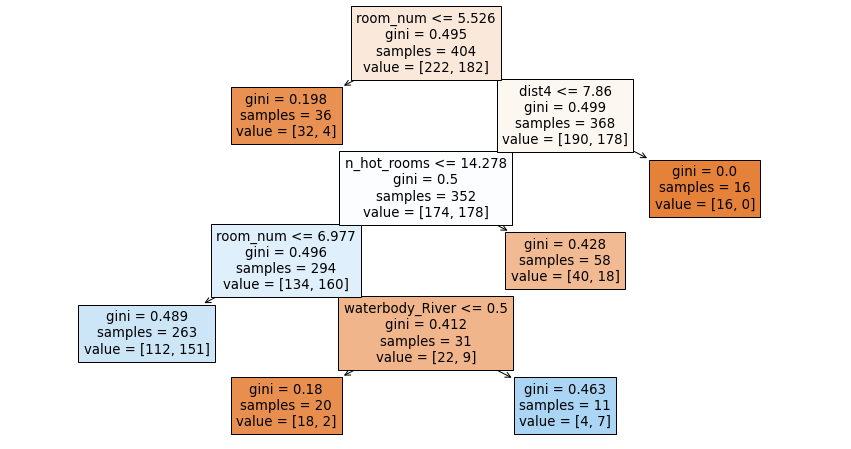

In [35]:
# type your code here
decision_tree = DecisionTreeClassifier(max_leaf_nodes=6,criterion='gini')

decision_tree = decision_tree.fit(X_train,y_train)

labels = X_train.columns

dot_data = tree.plot_tree(decision_tree,filled = True,feature_names=X_train.columns)
#dot_data = tree.export_graphviz(decision_tree,feature_names = labels,class_names = ["No","Yes"])

#graph = pydotplus.graph_from_dot_data(dot_data)

#Image(graph.create_png())

**Calculate performance measures on the train set.**

In [36]:
# create a generalized function to calculate the metrics values for train set
def get_train_report(model):
    
    # for training set:
    # train_pred: prediction made by the model on the train dataset 'X_train'
    # y_train: actual values of the target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(X_train)

    # return the performace measures on train set
    return(classification_report(y_train, train_pred))

In [37]:
# compute the performance measures on train data
# call the function 'get_train_report'
# pass the decision tree to the function
train_report = get_train_report(decision_tree)

# print the performance measures
print(train_report)

              precision    recall  f1-score   support

           0       0.82      0.48      0.60       222
           1       0.58      0.87      0.69       182

    accuracy                           0.65       404
   macro avg       0.70      0.67      0.65       404
weighted avg       0.71      0.65      0.64       404



In [38]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(X_test)

    # return the performace measures on test set
    return(classification_report(y_test, test_pred))

In [39]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the decision tree to the function
test_report = get_test_report(decision_tree)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.53      0.43      0.47        54
           1       0.47      0.58      0.52        48

    accuracy                           0.50       102
   macro avg       0.50      0.50      0.50       102
weighted avg       0.51      0.50      0.50       102



**Interpretation:** From the above output, we can see that there is a difference between the train and test accuracy; thus, we can conclude that the decision tree is over-fitted on the train data.

If we tune the hyperparameters in the decision tree, it helps to avoid the over-fitting of the tree.

In [40]:
# pass the criteria 'gini' to the parameter, 'criterion' 
# max_depth: that assigns maximum depth of the tree
# min_samples_split: assigns minimum number of samples to split an internal node
# max_leaf_nodes': assigns maximum number of leaf nodes in the tree
# pass the 'random_state' to obtain the same samples for each time you run the code
dt_model = DecisionTreeClassifier(criterion = 'gini',
                                  max_depth = 5,
                                  min_samples_split = 4,
                                  max_leaf_nodes = 6,
                                  random_state = 10)

# fit the model using fit() on train data
decision_tree = dt_model.fit(X_train, y_train)

# compute the performance measures on train data
# call the function 'get_train_report'
# pass the decision tree to the function
train_report = get_train_report(decision_tree)

# print the performance measures
print('Train data:\n', train_report)

# compute the performance measures on test data
# call the function 'get_test_report'
# pass the decision tree to the function
test_report = get_test_report(decision_tree)

# print the performance measures
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.82      0.48      0.60       222
           1       0.58      0.87      0.69       182

    accuracy                           0.65       404
   macro avg       0.70      0.67      0.65       404
weighted avg       0.71      0.65      0.64       404

Test data:
               precision    recall  f1-score   support

           0       0.53      0.43      0.47        54
           1       0.47      0.58      0.52        48

    accuracy                           0.50       102
   macro avg       0.50      0.50      0.50       102
weighted avg       0.51      0.50      0.50       102



<a id="rf"></a>
# 4. Random Forest for Classification

It is the method of constructing multiple decision trees on randomly selected data samples. We can use the bootstrap sampling method to select the random samples of the same size from the dataset to construct multiple trees. This method is used for both regression and classification analysis. The random forest returns the prediction based on all the individual decision trees prediction. For regression, it returns the average of all the predicted values; and for classification, it returns the class, which is the mode of all the predicted classes. 

It avoids the over-fitting problem as it considers a random data sample to construct a decision tree. 

In [41]:
# instantiate the 'RandomForestClassifier'
# pass the required number of trees in the random forest to the parameter, 'n_estimators'
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_classification.fit(X_train, y_train)

**Calculate performance measures on the train set.**

In [42]:
# compute the performance measures on train data
# call the function 'get_train_report'
# pass the random forest model to the function
train_report = get_train_report(rf_model)

# print the performace measures
print(train_report) 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       222
           1       0.98      0.99      0.99       182

    accuracy                           0.99       404
   macro avg       0.99      0.99      0.99       404
weighted avg       0.99      0.99      0.99       404



**Calculate performance measures on the test set.**

In [43]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the random forest model to the function
test_report = get_test_report(rf_model)

# print the performace measures
print(test_report) 

              precision    recall  f1-score   support

           0       0.55      0.69      0.61        54
           1       0.51      0.38      0.43        48

    accuracy                           0.54       102
   macro avg       0.53      0.53      0.52       102
weighted avg       0.53      0.54      0.53       102



<a id="hyper_rf"></a>
## 4.1 Tune the Hyperparameters using GridSearchCV (Random Forest)

In [45]:
# create a dictionary with hyperparameters and its values
# pass the criteria 'entropy' and 'gini' to the parameter, 'criterion' 
# pass a list of values to 'n_estimators' to build the different number of trees in the random forest
# pass a list of values to 'max_depth' that assigns maximum depth of the tree
# 'max_features' assigns maximum number of features to consider for the best split. We pass the string 'sqrt' and 'log2'
# 'sqrt' considers maximum number of features equal to the square root of total features
# 'log2' considers maximum number of features equal to the log of total features with base 2
# pass a list of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
# pass a list of values to 'min_samples_leaf' that assigns minimum number of samples required at the terminal/leaf node
# pass a list of values to 'max_leaf_nodes' that assigns maximum number of leaf nodes in the tree
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 20, 25, 30, 35],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]
 
# instantiate the 'RandomForestClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
random_forest_classification = RandomForestClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the random forest classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

# use fit() to fit the model on the train set
rf_grid_model = rf_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 11, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 30} 



#### Build the model using the tuned hyperparameters.

In [46]:
# instantiate the 'RandomForestClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
rf_model = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

# use fit() to fit the model on the train set
rf_model = rf_model.fit(X_train, y_train)

# print the performance measures for test set for the model with best parameters
print('Classification Report for test set:\n', get_test_report(rf_model))

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.58      0.65      0.61        54
           1       0.55      0.48      0.51        48

    accuracy                           0.57       102
   macro avg       0.57      0.56      0.56       102
weighted avg       0.57      0.57      0.57       102



**Interpretation:** The `accuracy` of the test dataset increased from 0.54 to 0.57 after tuning of the hyperparameters. Also, the sensitivity and specificity of the model are balanced.

### Identify the Important Features

Let us create a barplot to identify the important feature in the dataset.

The method `feature_importances_` returns the value corresponding to each feature which is defined as the ratio of total decrease in `Gini impurity` across every tree in the forest where the feature is used to the total count of trees in the forest. This is also caled as, `Gini Importance`.

There is another `accuracy-based` method. It calculates the average decrease in the accuracy calculated on the out-of-bag samples, with and without shuffling the variable across all the trees in the random forest. 
The `out-of-bag` samples are the samples in the training dataset which are not considered whild building a tree.

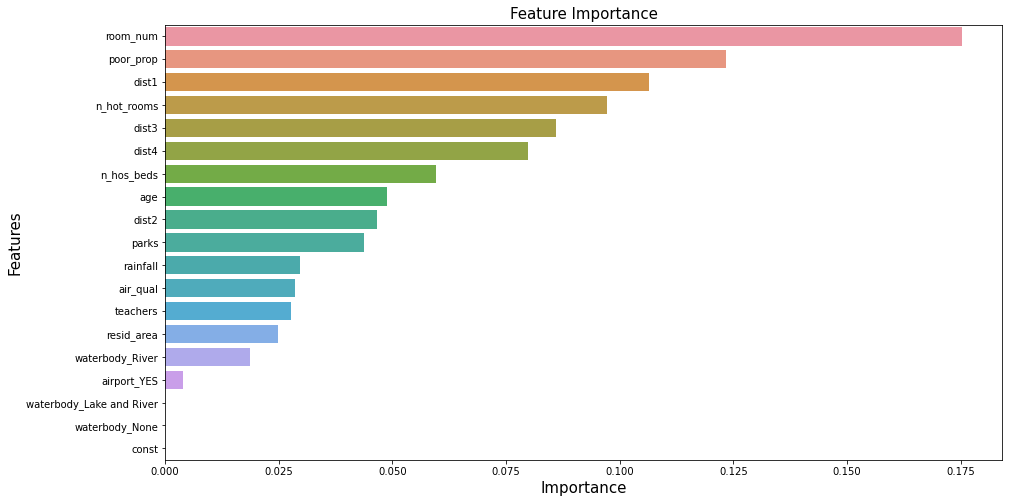

In [47]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the gini importance
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': rf_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

**Interpretation:** From the above bar plot, we can see that `room_num` is the most important feature in the dataset.

In [48]:
# compute the performance measures on train data
# call the function 'get_train_report'
# pass the random forest model to the function
train_report = get_train_report(rf_model)

# print the performace measures
print(train_report) 

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       222
           1       0.86      0.75      0.80       182

    accuracy                           0.83       404
   macro avg       0.84      0.82      0.83       404
weighted avg       0.83      0.83      0.83       404



<table align="center" width=100%>
    <tr>
        </td>
            </td>
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Decision Tree & Random Forest (End) <End>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## "END" New learning Begins lets explore other model and see what are there Responces